In [2]:

from pandas import read_pickle, DataFrame
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = read_pickle("app/data/data_all_features.pkl")

In [4]:
X_train = data.get("X_train")
y_train = data.get("y_train")
X_test = data.get("X_test")
feature_names = data.get("feature_names")
categorical = data.get("categorical")
numerical = data.get("numerical")
id_numeration_train = data.get("id_numeration_train")
id_numeration_test = data.get("id_numeration_test")

In [5]:
def get_visitor_dataframe(X_train, y_train):
    visitor_dataframe = DataFrame(columns=feature_names, data=X_train)
    visitor_dataframe["totals_transaction_revenue"] = y_train
    return visitor_dataframe

def remove_non_paying_visitors(visitor_dataframe):
    visits_with_positive_revenue = visitor_dataframe[visitor_dataframe["totals_transaction_revenue"] > 0]
    visits_without_revenue = visitor_dataframe[visitor_dataframe["totals_transaction_revenue"] == 0]
    return visits_with_positive_revenue, visits_without_revenue

In [6]:
visitor_dataframe = get_visitor_dataframe(X_train, y_train)
paying_visitor_dataframe, non_paying_visitor_dataframe = remove_non_paying_visitors(visitor_dataframe)

In [7]:
def plot_barchart_averages(data, labels, label_name, title):
    y_pos = np.arange(len(labels))
    plt.bar(y_pos, data, align='center', alpha=0.5)
    plt.xticks(y_pos, labels)
    plt.ylabel(label_name)
    plt.title(title)
    plt.show()


def plot_barchart_average_column(pay_base_dataframe, non_pay_base_dataframe, column_name):
    pay = pay_base_dataframe[column_name] 
    avg_pay = np.average(pay.values)

    non_pay = non_pay_base_dataframe[column_name] 
    avg_non_pay = np.average(non_pay.values)

    data = [avg_pay, avg_non_pay]
    labels = ["Pay", "Non Pay"]
    label_name = "Average"
    title = column_name

    plot_barchart_averages(data, labels, label_name, title)


def plot_grouped_bar_chart(
    paying_visitor_dataframe, 
    non_paying_visitor_dataframe,
    column_names,
    part_to_strip,
    title
):
    pay_avg = []
    non_pay_avg = []
    for column_name in column_names:
        pay_avg.append(round(np.average(paying_visitor_dataframe[column_name].values),3)*100)
        non_pay_avg.append(round(np.average(non_paying_visitor_dataframe[column_name].values),3)*100)

    x = np.arange(len(column_names))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(20,5))
    rects1 = ax.bar(x - width/2, pay_avg, width, label='Pay')
    rects2 = ax.bar(x + width/2, non_pay_avg, width, label='Non Pay')

    labels = [s.replace(part_to_strip, '') for s in column_names]
    ax.set_ylabel('Average')
    ax.set_title(title)
    ax.set_xticks(x, labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    plt.xticks(rotation=45, ha="right")

    plt.show()

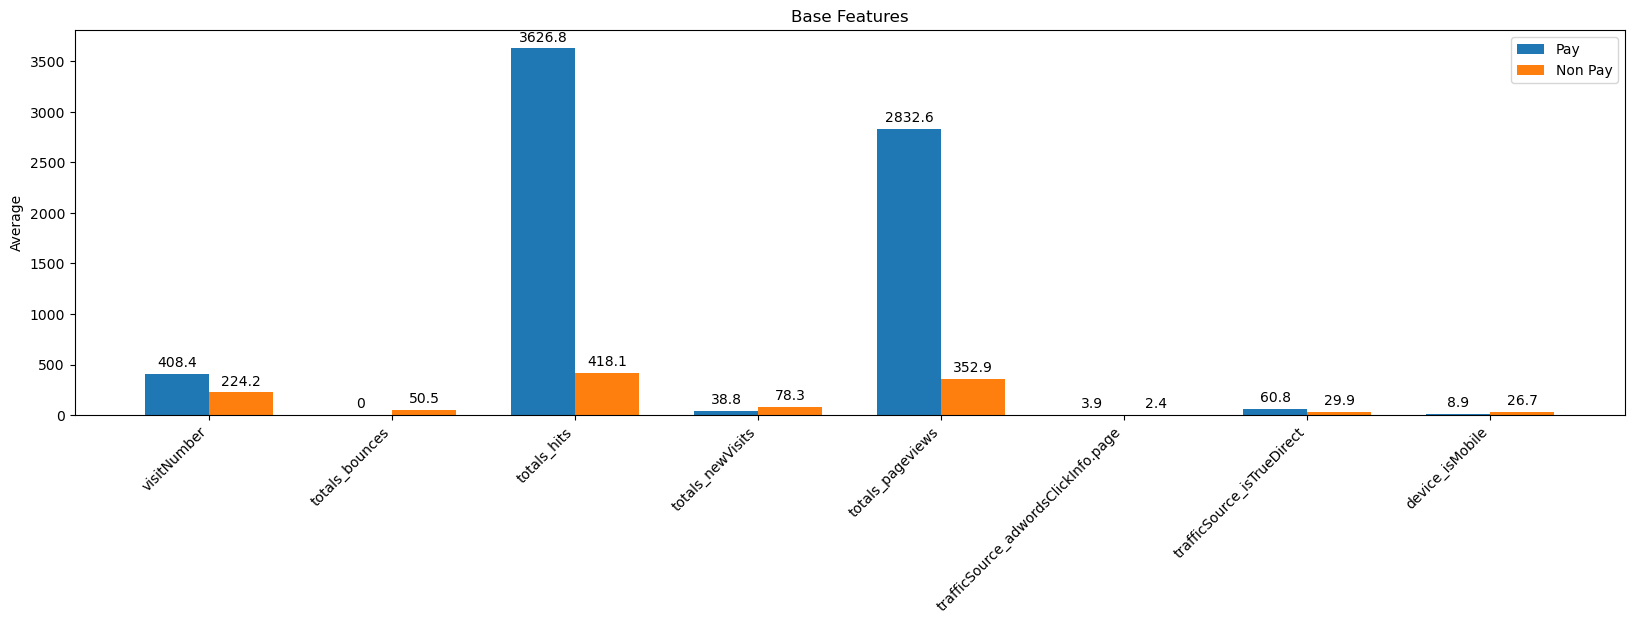

In [8]:
column_names = [
    'visitNumber',
    'totals_bounces',
    'totals_hits',
    'totals_newVisits',
    'totals_pageviews',
    'trafficSource_adwordsClickInfo.page',
    'trafficSource_isTrueDirect',
    'device_isMobile'
]

part_to_strip = ""
title = "Base Features"
plot_grouped_bar_chart(paying_visitor_dataframe, non_paying_visitor_dataframe, column_names, part_to_strip, title)

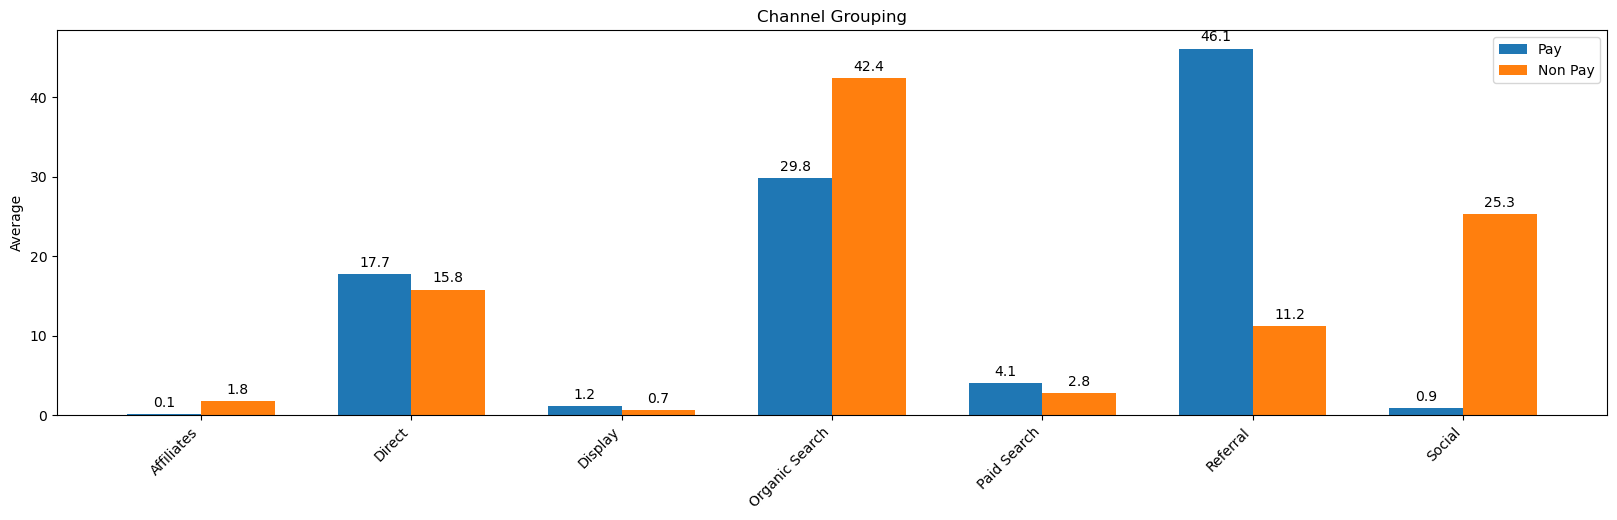

In [9]:
column_names = [
        "channelGrouping_Affiliates",
        "channelGrouping_Direct",
        "channelGrouping_Display",
        "channelGrouping_Organic Search",
        "channelGrouping_Paid Search",
        "channelGrouping_Referral",
        "channelGrouping_Social"
]
part_to_strip = "channelGrouping_"
title = "Channel Grouping"

plot_grouped_bar_chart(paying_visitor_dataframe, non_paying_visitor_dataframe, column_names, part_to_strip, title)

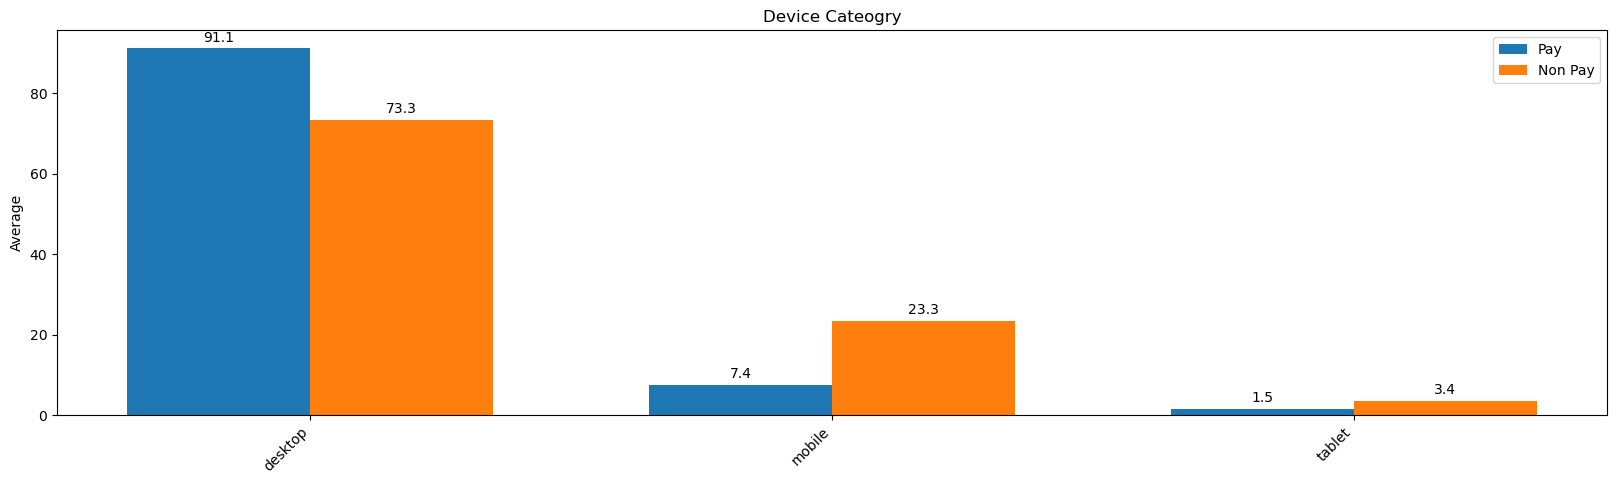

In [10]:
column_names = [
        "device_deviceCategory_desktop",
        "device_deviceCategory_mobile",
        "device_deviceCategory_tablet"
]
part_to_strip = "device_deviceCategory_"
title = "Device Cateogry"

plot_grouped_bar_chart(paying_visitor_dataframe, non_paying_visitor_dataframe, column_names, part_to_strip, title)


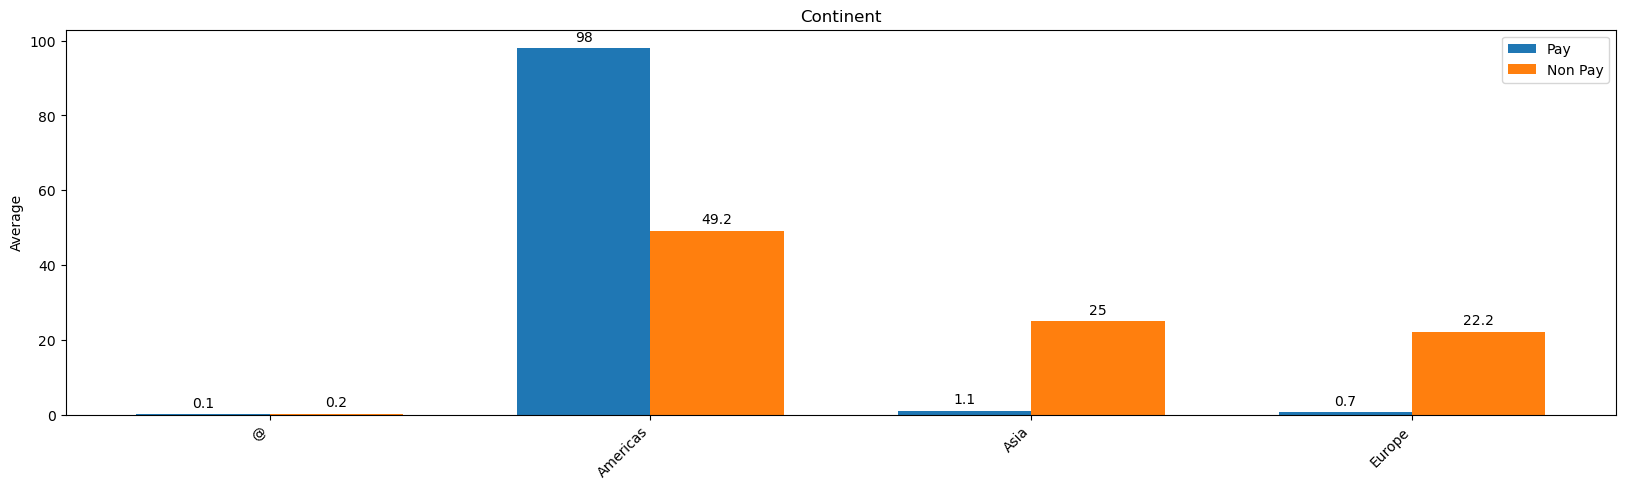

In [17]:
column_names = [
        "geoNetwork_continent_@",
        "geoNetwork_continent_Americas",
        "geoNetwork_continent_Asia",
        "geoNetwork_continent_Europe"
]
part_to_strip = "geoNetwork_continent_"
title = "Continent"

plot_grouped_bar_chart(paying_visitor_dataframe, non_paying_visitor_dataframe, column_names, part_to_strip, title)

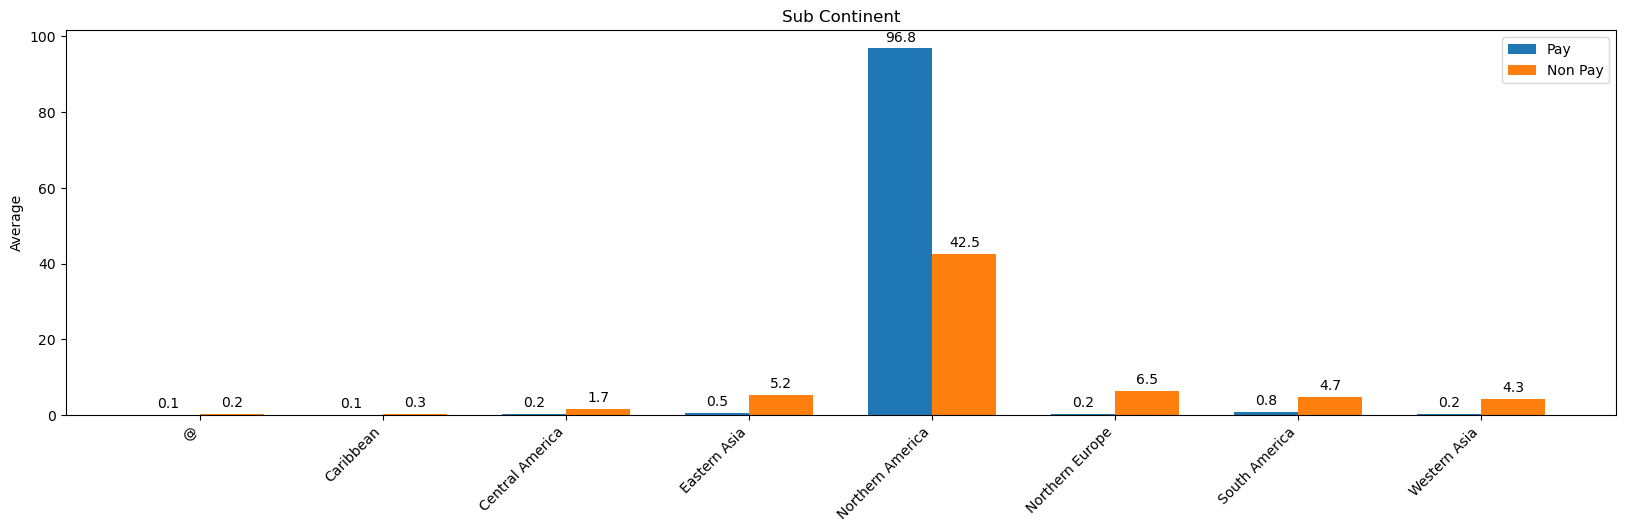

In [19]:
column_names = [
        "geoNetwork_subContinent_@",
        "geoNetwork_subContinent_Caribbean",
        "geoNetwork_subContinent_Central America",
        "geoNetwork_subContinent_Eastern Asia",
        "geoNetwork_subContinent_Northern America",
        "geoNetwork_subContinent_Northern Europe",
        "geoNetwork_subContinent_South America",
        "geoNetwork_subContinent_Western Asia"
]
part_to_strip = "geoNetwork_subContinent_"
title = "Sub Continent"

plot_grouped_bar_chart(paying_visitor_dataframe, non_paying_visitor_dataframe, column_names, part_to_strip, title)

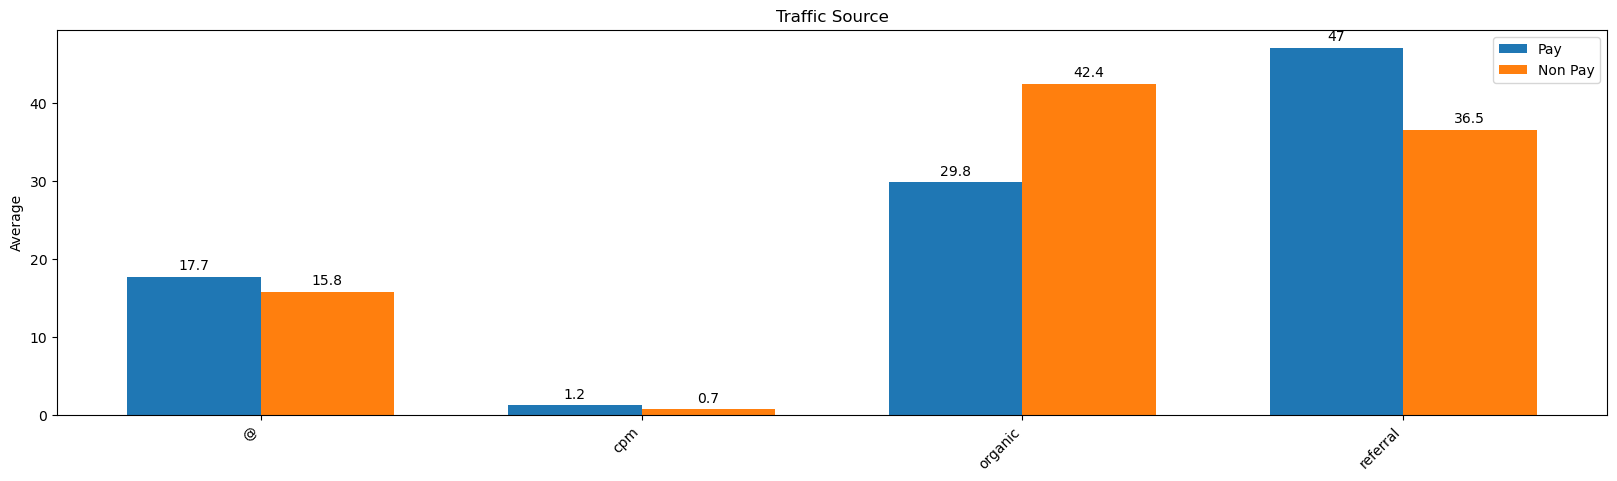

In [20]:
column_names = [
        "trafficSource_medium_@",
        "trafficSource_medium_cpm",
        "trafficSource_medium_organic",
        "trafficSource_medium_referral"
]
part_to_strip = "trafficSource_medium_"
title = "Traffic Source"

plot_grouped_bar_chart(paying_visitor_dataframe, non_paying_visitor_dataframe, column_names, part_to_strip, title)

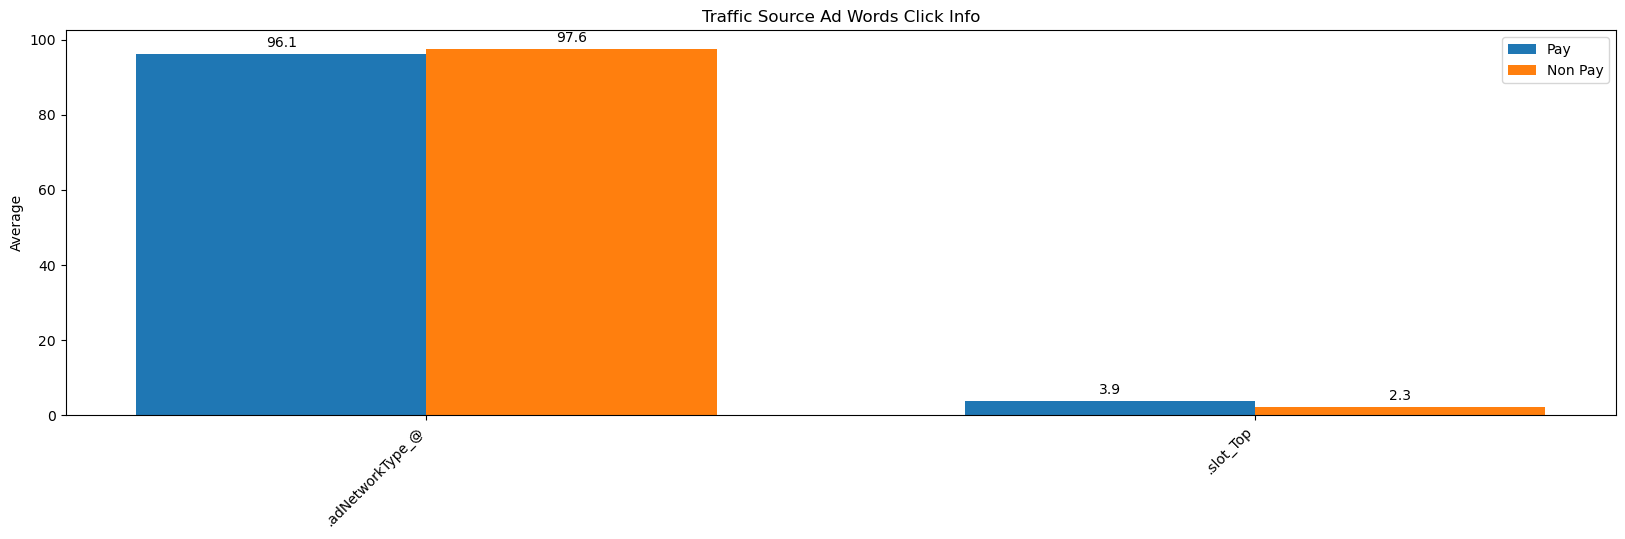

In [15]:
column_names = [
        "trafficSource_adwordsClickInfo.adNetworkType_@",
        "trafficSource_adwordsClickInfo.slot_Top"
]
part_to_strip = "trafficSource_adwordsClickInfo"
title = "Traffic Source Ad Words Click Info"

plot_grouped_bar_chart(paying_visitor_dataframe, non_paying_visitor_dataframe, column_names, part_to_strip, title)

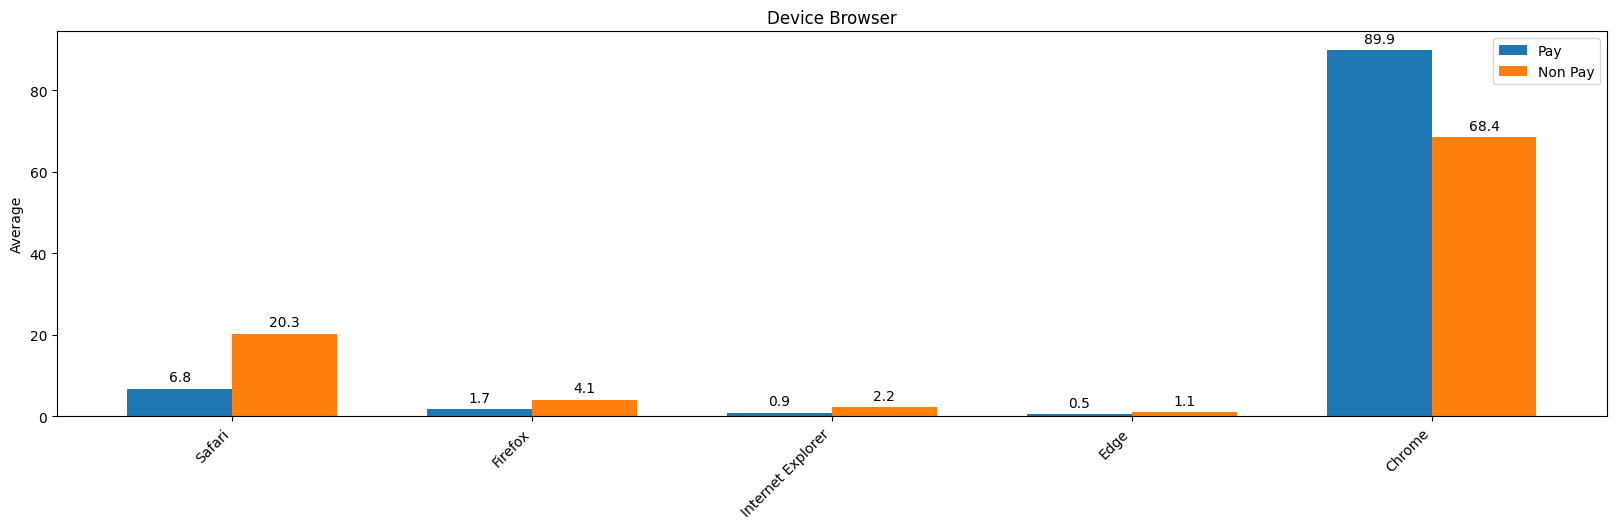

In [65]:
column_names = [
        "device_browser_Safari",
        "device_browser_Firefox",
        "device_browser_Internet Explorer",
        "device_browser_Edge",
        "device_browser_Chrome"
]
part_to_strip = "device_browser_"
title = "Device Browser"

plot_grouped_bar_chart(paying_visitor_dataframe, non_paying_visitor_dataframe, column_names, part_to_strip, title)

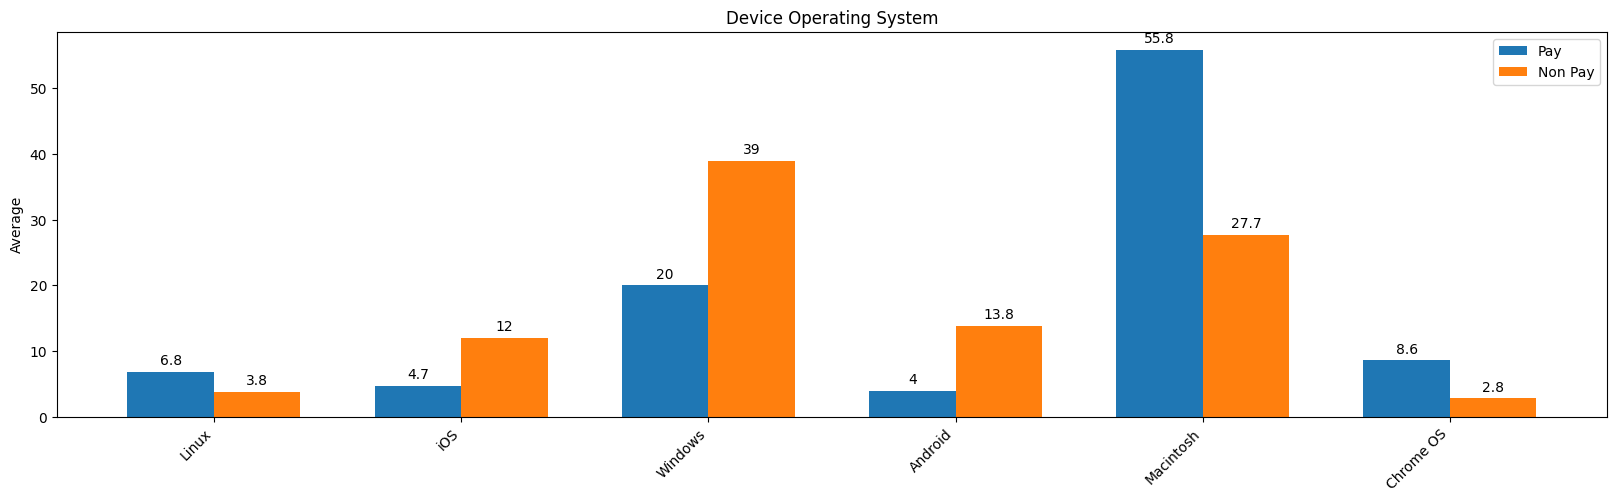

In [66]:
column_names = [
        "device_operatingSystem_Linux",
        "device_operatingSystem_iOS",
        "device_operatingSystem_Windows",
        "device_operatingSystem_Android",
        "device_operatingSystem_Macintosh",
        "device_operatingSystem_Chrome OS",
]
part_to_strip = "device_operatingSystem_"
title = "Device Operating System"

plot_grouped_bar_chart(paying_visitor_dataframe, non_paying_visitor_dataframe, column_names, part_to_strip, title)

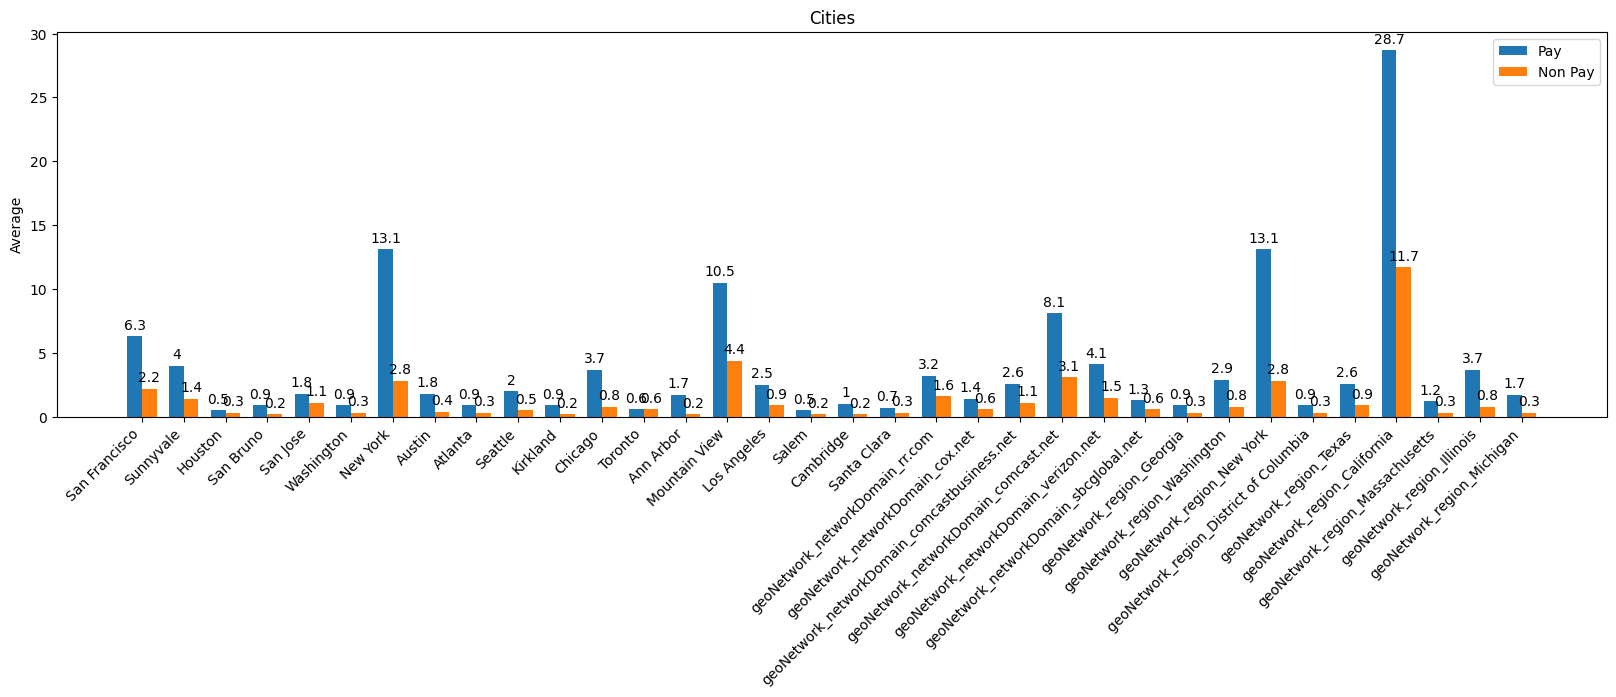

In [67]:
column_names = [
        "geoNetwork_city_San Francisco",
        "geoNetwork_city_Sunnyvale",
        "geoNetwork_city_Houston",
        "geoNetwork_city_San Bruno",
        "geoNetwork_city_San Jose",
        "geoNetwork_city_Washington",
        "geoNetwork_city_New York",
        "geoNetwork_city_Austin",
        "geoNetwork_city_Atlanta",
        "geoNetwork_city_Seattle",
        "geoNetwork_city_Kirkland",
        "geoNetwork_city_Chicago",
        "geoNetwork_city_Toronto",
        "geoNetwork_city_Ann Arbor",
        "geoNetwork_city_Mountain View",
        "geoNetwork_city_Los Angeles",
        "geoNetwork_city_Salem",
        "geoNetwork_city_Cambridge",
        "geoNetwork_city_Santa Clara",
        "geoNetwork_networkDomain_rr.com",
        "geoNetwork_networkDomain_cox.net",
        "geoNetwork_networkDomain_comcastbusiness.net",
        "geoNetwork_networkDomain_comcast.net",
        "geoNetwork_networkDomain_verizon.net",
        "geoNetwork_networkDomain_sbcglobal.net",
        "geoNetwork_region_Georgia",
        "geoNetwork_region_Washington",
        "geoNetwork_region_New York",
        "geoNetwork_region_District of Columbia",
        "geoNetwork_region_Texas",
        "geoNetwork_region_California",
        "geoNetwork_region_Massachusetts",
        "geoNetwork_region_Illinois",
        "geoNetwork_region_Michigan"
]
part_to_strip = "geoNetwork_city_"
title = "Cities"

plot_grouped_bar_chart(paying_visitor_dataframe, non_paying_visitor_dataframe, column_names, part_to_strip, title)

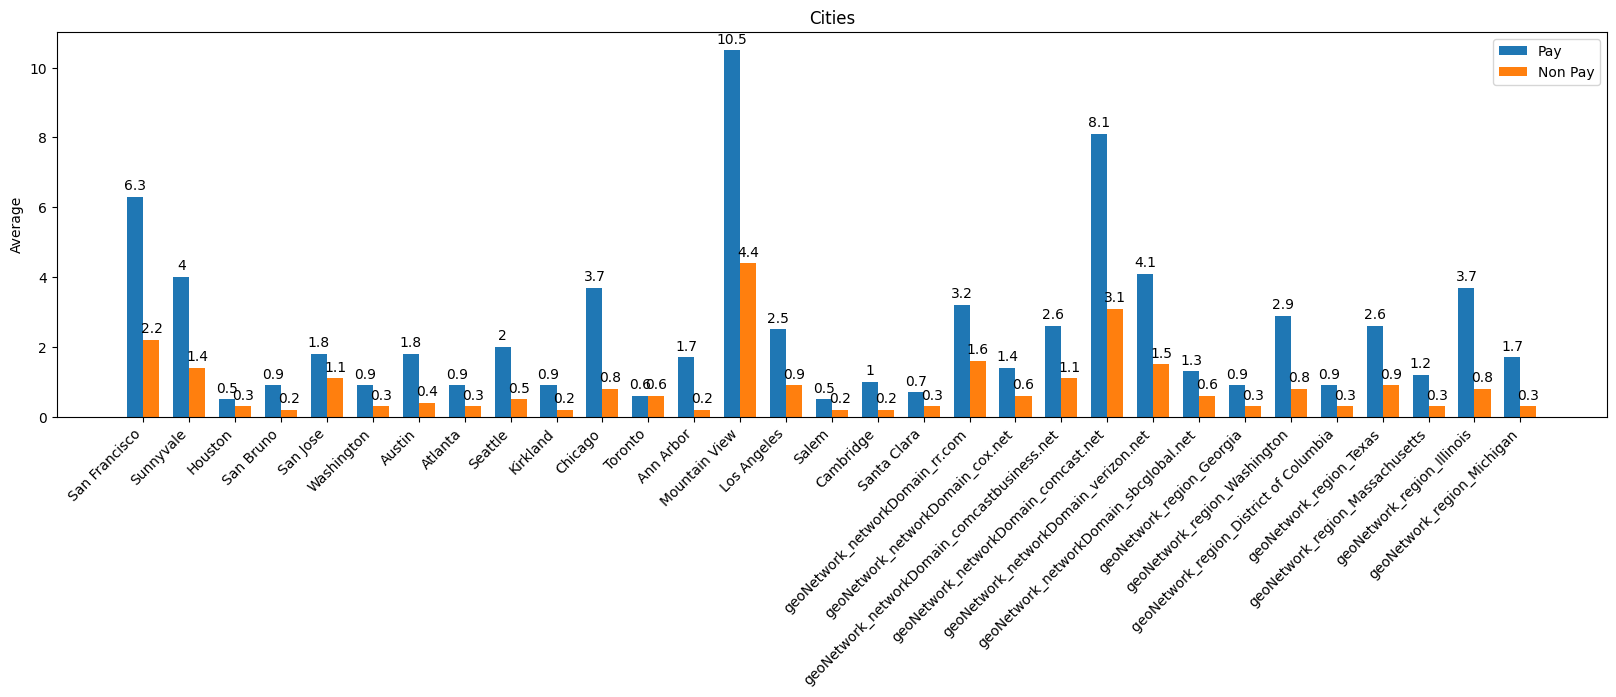

In [69]:
column_names = [
        "geoNetwork_city_San Francisco",
        "geoNetwork_city_Sunnyvale",
        "geoNetwork_city_Houston",
        "geoNetwork_city_San Bruno",
        "geoNetwork_city_San Jose",
        "geoNetwork_city_Washington",
        # "geoNetwork_city_New York",
        "geoNetwork_city_Austin",
        "geoNetwork_city_Atlanta",
        "geoNetwork_city_Seattle",
        "geoNetwork_city_Kirkland",
        "geoNetwork_city_Chicago",
        "geoNetwork_city_Toronto",
        "geoNetwork_city_Ann Arbor",
        "geoNetwork_city_Mountain View",
        "geoNetwork_city_Los Angeles",
        "geoNetwork_city_Salem",
        "geoNetwork_city_Cambridge",
        "geoNetwork_city_Santa Clara",
        "geoNetwork_networkDomain_rr.com",
        "geoNetwork_networkDomain_cox.net",
        "geoNetwork_networkDomain_comcastbusiness.net",
        "geoNetwork_networkDomain_comcast.net",
        "geoNetwork_networkDomain_verizon.net",
        "geoNetwork_networkDomain_sbcglobal.net",
        "geoNetwork_region_Georgia",
        "geoNetwork_region_Washington",
        # "geoNetwork_region_New York",
        "geoNetwork_region_District of Columbia",
        "geoNetwork_region_Texas",
        # "geoNetwork_region_California",
        "geoNetwork_region_Massachusetts",
        "geoNetwork_region_Illinois",
        "geoNetwork_region_Michigan"
]
part_to_strip = "geoNetwork_city_"
title = "Cities"

plot_grouped_bar_chart(paying_visitor_dataframe, non_paying_visitor_dataframe, column_names, part_to_strip, title)

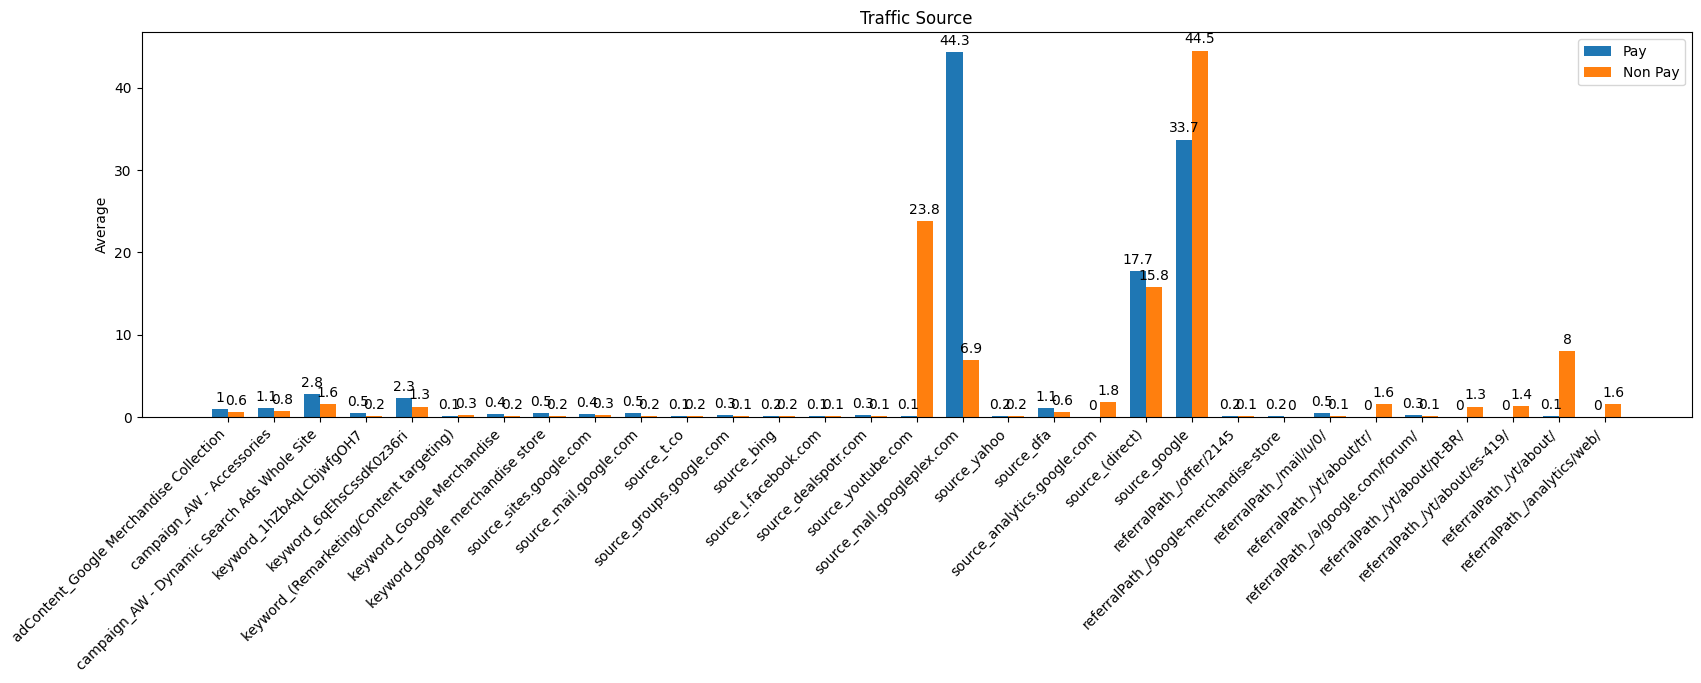

In [72]:
column_names = [
        "trafficSource_adContent_Google Merchandise Collection",
        "trafficSource_campaign_AW - Accessories",
        "trafficSource_campaign_AW - Dynamic Search Ads Whole Site",
        "trafficSource_keyword_1hZbAqLCbjwfgOH7",
        "trafficSource_keyword_6qEhsCssdK0z36ri",
        "trafficSource_keyword_(Remarketing/Content targeting)",
        "trafficSource_keyword_Google Merchandise",
        "trafficSource_keyword_google merchandise store",
        "trafficSource_source_sites.google.com",
        "trafficSource_source_mail.google.com",
        "trafficSource_source_t.co",
        "trafficSource_source_groups.google.com",
        "trafficSource_source_bing",
        "trafficSource_source_l.facebook.com",
        "trafficSource_source_dealspotr.com",
        "trafficSource_source_youtube.com",
        "trafficSource_source_mall.googleplex.com",
        "trafficSource_source_yahoo",
        "trafficSource_source_dfa",
        "trafficSource_source_analytics.google.com",
        "trafficSource_source_(direct)",
        "trafficSource_source_google",
        "trafficSource_referralPath_/offer/2145",
        "trafficSource_referralPath_/google-merchandise-store",
        "trafficSource_referralPath_/mail/u/0/",
        "trafficSource_referralPath_/yt/about/tr/",
        "trafficSource_referralPath_/a/google.com/forum/",
        "trafficSource_referralPath_/yt/about/pt-BR/",
        "trafficSource_referralPath_/yt/about/es-419/",
        "trafficSource_referralPath_/yt/about/",
        "trafficSource_referralPath_/analytics/web/"
]
part_to_strip = "trafficSource_"
title = "Traffic Source"

plot_grouped_bar_chart(paying_visitor_dataframe, non_paying_visitor_dataframe, column_names, part_to_strip, title)

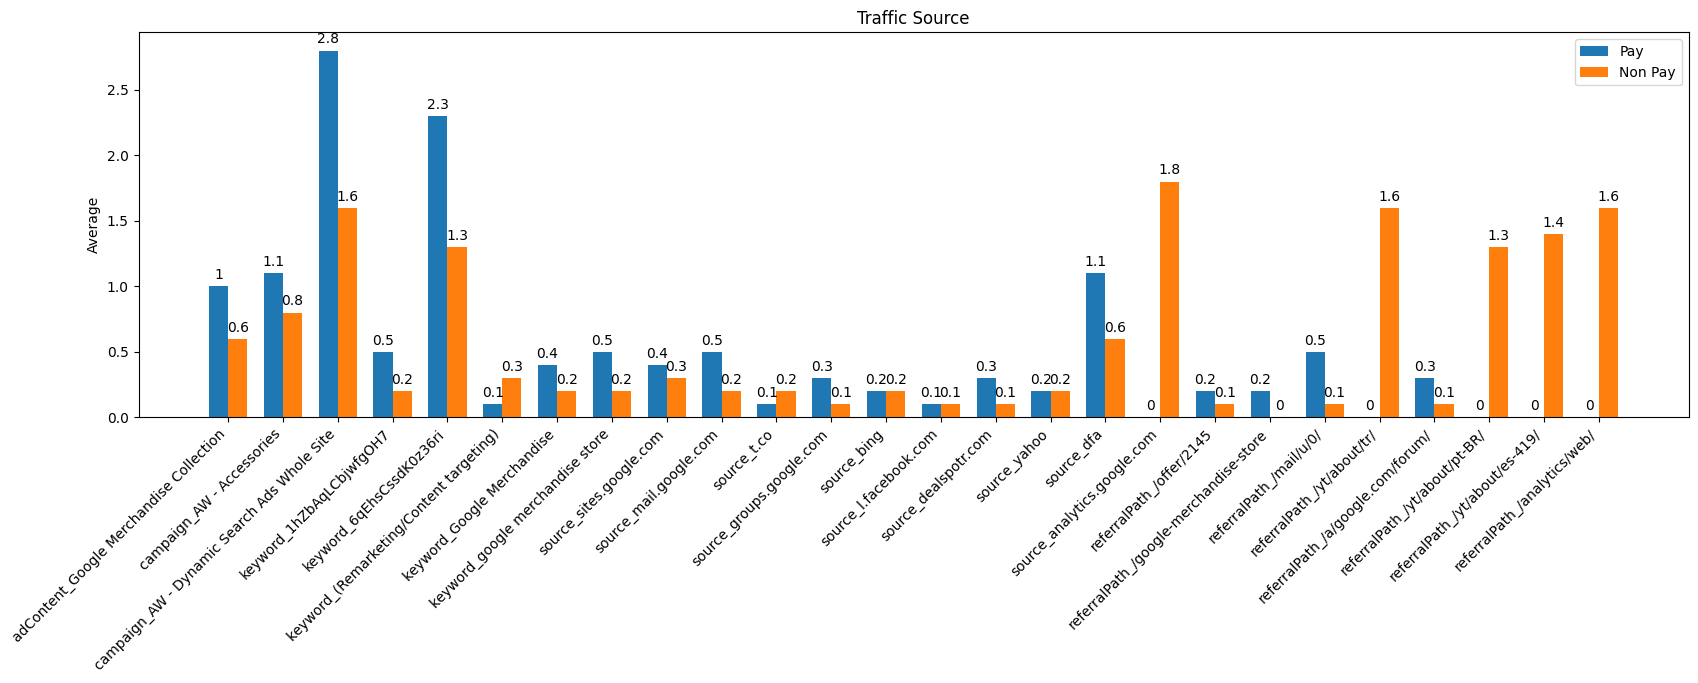

In [74]:
column_names = [
        "trafficSource_adContent_Google Merchandise Collection",
        "trafficSource_campaign_AW - Accessories",
        "trafficSource_campaign_AW - Dynamic Search Ads Whole Site",
        "trafficSource_keyword_1hZbAqLCbjwfgOH7",
        "trafficSource_keyword_6qEhsCssdK0z36ri",
        "trafficSource_keyword_(Remarketing/Content targeting)",
        "trafficSource_keyword_Google Merchandise",
        "trafficSource_keyword_google merchandise store",
        "trafficSource_source_sites.google.com",
        "trafficSource_source_mail.google.com",
        "trafficSource_source_t.co",
        "trafficSource_source_groups.google.com",
        "trafficSource_source_bing",
        "trafficSource_source_l.facebook.com",
        "trafficSource_source_dealspotr.com",
        # "trafficSource_source_youtube.com",
        # "trafficSource_source_mall.googleplex.com",
        "trafficSource_source_yahoo",
        "trafficSource_source_dfa",
        "trafficSource_source_analytics.google.com",
        # "trafficSource_source_(direct)",
        # "trafficSource_source_google",
        "trafficSource_referralPath_/offer/2145",
        "trafficSource_referralPath_/google-merchandise-store",
        "trafficSource_referralPath_/mail/u/0/",
        "trafficSource_referralPath_/yt/about/tr/",
        "trafficSource_referralPath_/a/google.com/forum/",
        "trafficSource_referralPath_/yt/about/pt-BR/",
        "trafficSource_referralPath_/yt/about/es-419/",
        # "trafficSource_referralPath_/yt/about/",
        "trafficSource_referralPath_/analytics/web/"
]
part_to_strip = "trafficSource_"
title = "Traffic Source"

plot_grouped_bar_chart(paying_visitor_dataframe, non_paying_visitor_dataframe, column_names, part_to_strip, title)